# Baseline Documentation

### Introduction

This project was created by Nikolas Tomašík and Kamil Džurman. We solve colorizing black and white pictures using convolutional neural networks along with pretrained ResNet inception classifier. For baseline solution, we were strongly inspired by [Emil Wallner's blog](https://blog.floydhub.com/colorizing-b-w-photos-with-neural-networks/).

### Data

We used approximately nine thousand pictures for training and evaluating the model. We acquired the data from [floydhub](https://www.floydhub.com/emilwallner/datasets/colornet/2). It is a collection of high resolution same sized various images. We took a look at 

### Solution

For color space, we use Lab color format. Since it has encoded grayscale layer in one of its three layers, it packs original 3 RGB layers into two (green-red, blue-yellow spectrum), which means we have one less layer to predict. Color values in Lab go from -128 to 128. By dividing them with 128, they too fall within the -1 to 1 interval. This makes computing error easy. 

Without extracting features from images, the neural network would simply paint all the images brown. The color brown is most similar to all other colors and thus the neural networks produces small error. Other networks use upsampling layers which increase information density, but distort the image. Instead, we use strides to increase information density, but we do not distort the image.

Compared to the blog, we created a simpler model by deleting a few convolutional layers. Empirically, a more basic model worked better for our case concerning quality of the output and also made it faster. We use a classifier - inception resnet v2, pretrained on 1.2M of images. This helps the neural network determine what is in the picture and thus match certain objects with colors. Model architecture can be seen here:

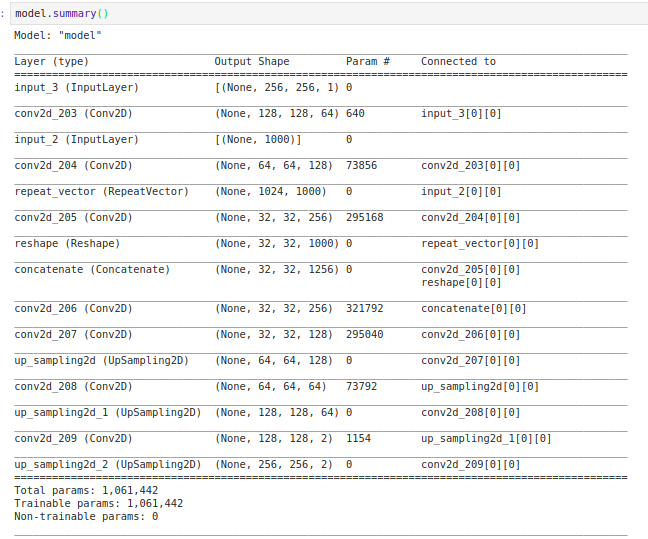

We initialized an input layer with the same size as the images - (256, 256, 3). Then, several convolutional layers follow, serving as an encoder. After it comes the resnet inception embedding layer which is appended to the original network. After the concatenation, we use a decoder, consisting of convolutional and upsampling layers.

### Implementation details

We defined helper functions in /src/helpers/dataset_helpers.py. Compared to the baseline, which forces loading of batches into memory, we use a generator, which performs better on GPU and saves RAM. Model and its functions can be found in src/model/. In train_model.py, model parameters can be set. Since we trained only a small model (max 64 image), we used batch size of 16 and 300 epochs in our training. To achieve model seeing all the training images in each epoch, we defined epoch steps according to the number of training images divided by batch size. We log the training process to /logs. Well-performing trained models are in /models.